<a href="https://colab.research.google.com/github/imjoung/DataScience/blob/main/ml/03_%EC%A7%80%EB%8F%84%ED%95%99%EC%8A%B5(supervised_learning)%EB%B6%84%EB%A5%98%EC%99%80_%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 한글깨짐방지

In [1]:
pip install mglearn

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


### k-최근접 이웃
-knn:알고리즘이 훈련 데이터셋에서 가장 가까운 데이터 포인트를 찾음 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


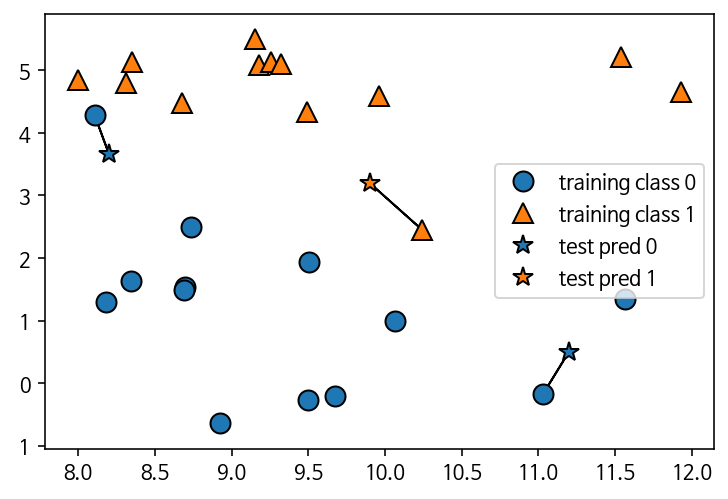

In [3]:
import mglearn
#plt.figure(dpi=100)
plt.rc('font',family='NanumBarunGothic')

# 제일 근접한 1개 이웃 선택 (k=1)
mglearn.plots.plot_knn_classification(n_neighbors=1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


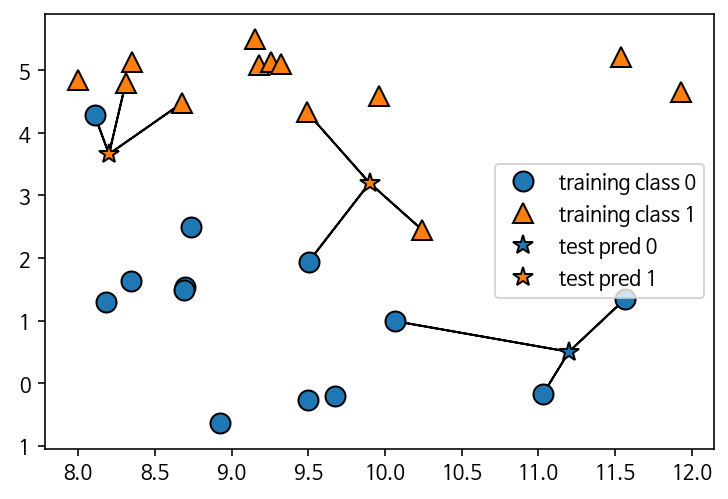

In [4]:
# 제일 근접한 1개 이웃 선택 (k=3)
mglearn.plots.plot_knn_classification(n_neighbors=3)

### 분류 문제정의 : forge 데이터 셋을 사용한 이진분류(Label,1) 예측하기
- knn적용하여 예측하고 평가하기

In [5]:
# 데이터 준비하기
from sklearn.model_selection import train_test_split

# X: 데이터(feature), y: 레이블(label, 정답)
X,y = mglearn.datasets.make_forge()

# 데이터 분리하기 (교차검증) -> test/train
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=7)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [6]:
# knn 임포트하고 객체 생성
from sklearn.neighbors import KNeighborsClassifier
# k=3
clf = KNeighborsClassifier(n_neighbors=3)

In [7]:
# 훈련 세트를 사용하여 분류 모델 학습
clf.fit(X_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [8]:
# 테스트 데이터에 대해 predict 메서드를 호출해서 예측
print("테스트 세트 예측: ",clf.predict(X_test))

테스트 세트 예측:  [0 1 0 0 0 1 1]


In [9]:
# score()함수 사용 -> 테스트 데이터와 테스트 레이블을 넣어 호출
print("테스트 세트의 정확도: {:.4f}".format(clf.score(X_test,y_test)))

테스트 세트의 정확도: 0.8571


KNeighborsClassifier 분석
- 이웃을 하나 선택했을 때는 결정 경계가 훈련 데이터에 가깝게 따라가고 있음
- 이웃의 수를 늘릴수록 결정 경계는 더 부드러워짐
- 부드러운 경계는 더 단순한 모델을 의미

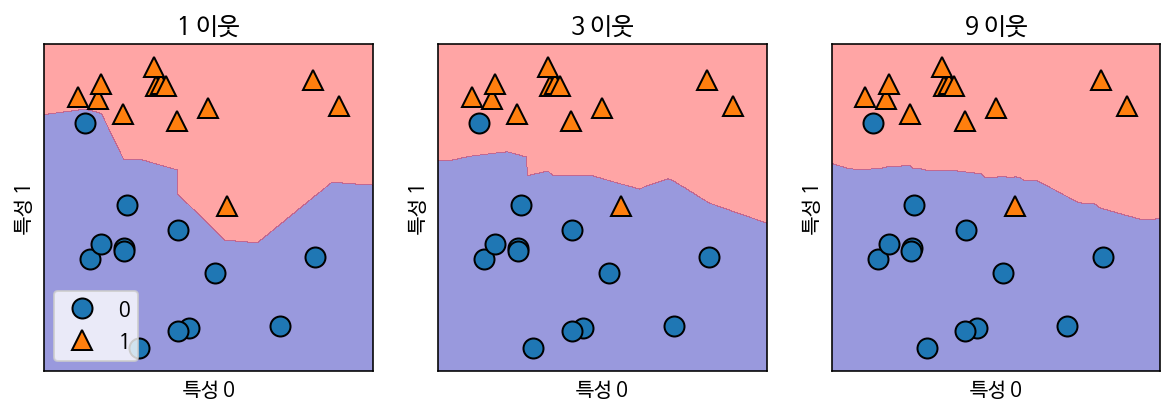

In [10]:
fig,axes = plt.subplots(1,3,figsize=(10,3))

# 이웃을 1,3,9일때의 결정 경계(decision boundary)
for n_neighbors,ax in zip([1,3,9],axes):
  clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
  
  # 2차원 데이터셋 분할 평면 그리기 
  # mglearn.plots.plot_wd_separator(model 객체,train 데이터,평면칠하기,투명도)
  mglearn.plots.plot_2d_separator(clf,X,fill=True,eps=0.5,ax=ax,alpha=.4)
  
  # 2차원 산점도 그리기
  mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
  ax.set_title("{} 이웃".format(n_neighbors))
  ax.set_xlabel("특성 0")
  ax.set_ylabel("특성 1")
axes[0].legend(loc=3)

k의 수(이웃의 수, 결정경계)에 따른 성능 평가


훈련 세트 정확도 :  [1.0, 1.0, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315]
테스트 세트 정확도 : [0.7142857142857143, 0.7142857142857143, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571]


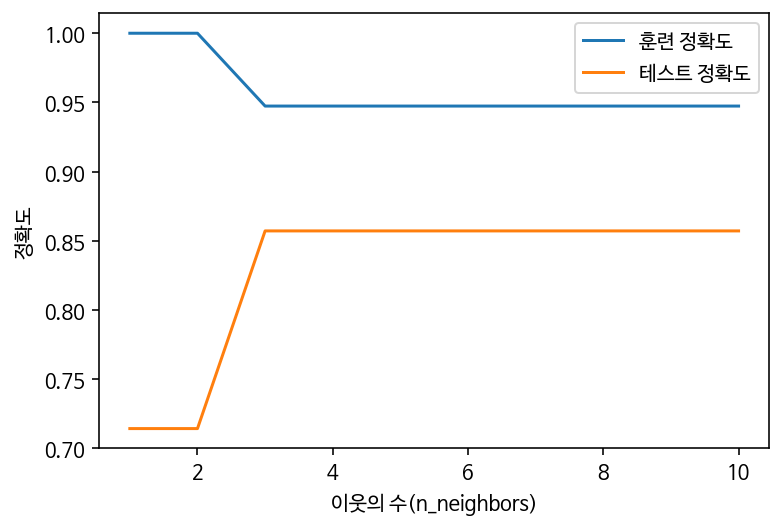

In [11]:
# 이웃의 수에 따른 정확도 저장할 리스트 변수
train_accuracy = []
test_accuracy = []

# 1에서 10까지 n_neighbors를 적용
neighbors_setting = range(1,11)

for n_neighbors in neighbors_setting :
  # 모델 생성
  clf = KNeighborsClassifier(n_neighbors=n_neighbors)
  clf.fit(X_train,y_train)

  # 훈련 세트 정확도 저장
  train_accuracy.append(clf.score(X_train, y_train))
  # 테스트 세트 정확도 저장
  test_accuracy.append(clf.score(X_test,y_test))


print("훈련 세트 정확도 : ",train_accuracy)
print("테스트 세트 정확도 :",test_accuracy)

#훈련 vs 테스트 정확도 시각화
plt.plot(neighbors_setting, train_accuracy, label="훈련 정확도")
plt.plot(neighbors_setting, test_accuracy, label= "테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("이웃의 수(n_neighbors)")
plt.legend()
plt.show()

### 유방암 데이터셋을 사용하여 이웃의 수(결정경계)에 따른 성능 평가

훈련 세트 정확도 :  [1.0, 0.9624413145539906, 0.9507042253521126, 0.9483568075117371, 0.9413145539906104, 0.9413145539906104, 0.9413145539906104, 0.9413145539906104, 0.9413145539906104, 0.9389671361502347]
테스트 세트 정확도 : [0.9230769230769231, 0.9230769230769231, 0.965034965034965, 0.9440559440559441, 0.951048951048951, 0.951048951048951, 0.951048951048951, 0.951048951048951, 0.951048951048951, 0.951048951048951]


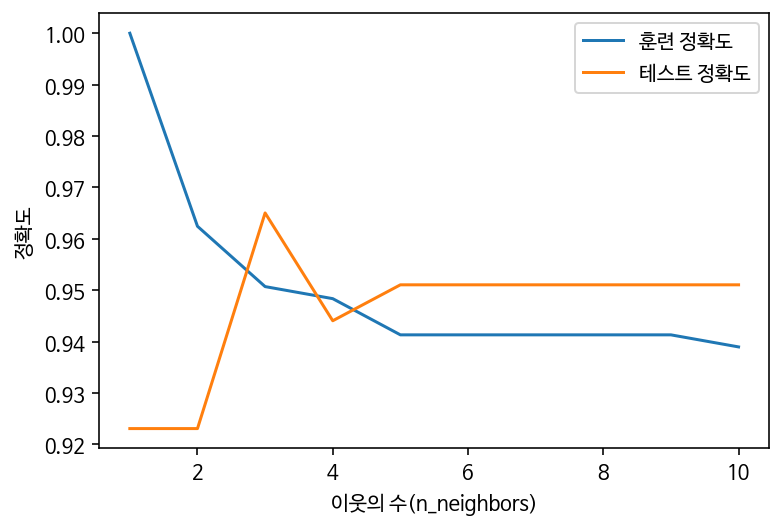

In [12]:
from sklearn.datasets import load_breast_cancer

# 데이터 다운로드
cancer = load_breast_cancer()

# 데이터셋 분리하기 (훈련셋, 테스트셋)
X_train,X_test,y_train,y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=777)


# 이웃의 수에 따른 정확도 저장할 리스트 변수
train_accuracy = []
test_accuracy = []

# 1에서 10까지 n_neighbors를 적용
neighbors_setting = range(1,11)

for n_neighbors in neighbors_setting :
  # 모델 생성
  clf = KNeighborsClassifier(n_neighbors=n_neighbors)
  clf.fit(X_train,y_train)

  # 훈련 세트 정확도 저장
  train_accuracy.append(clf.score(X_train, y_train))
  # 테스트 세트 정확도 저장
  test_accuracy.append(clf.score(X_test,y_test))


print("훈련 세트 정확도 : ",train_accuracy)
print("테스트 세트 정확도 :",test_accuracy)

#훈련 vs 테스트 정확도 시각화
plt.plot(neighbors_setting, train_accuracy, label="훈련 정확도")
plt.plot(neighbors_setting, test_accuracy, label= "테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("이웃의 수(n_neighbors)")
plt.legend()
plt.show()

### 성능평가 - ROC 커브

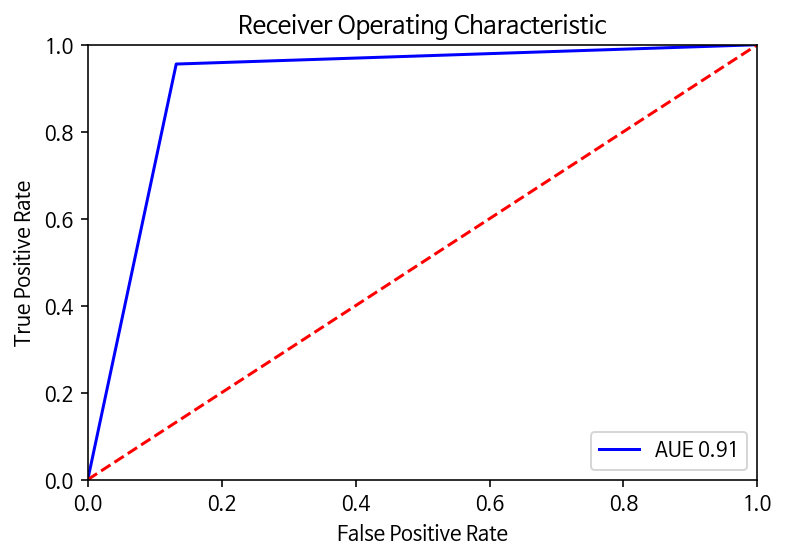

In [13]:
# Library for Analysing the ML model
from sklearn import metrics

# 모델 생성
clf = KNeighborsClassifier(n_neighbors=1).fit(X_train,y_train)
probs = clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I:plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label = 'AUE %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [14]:
# test data를 가지고 y_hat을 예측(분류)
y_hat = clf.predict(X_test)

# 모델 성능 평가 - 평가지표 계산
knn_report = metrics.classification_report(y_test,y_hat)
print(knn_report)

              precision    recall  f1-score   support

           0       0.92      0.87      0.89        53
           1       0.92      0.96      0.94        90

    accuracy                           0.92       143
   macro avg       0.92      0.91      0.92       143
weighted avg       0.92      0.92      0.92       143



In [15]:
# sklearn을 이용하면 전부 계산해준다.
print('accuracy: ', metrics.accuracy_score(y_test,y_hat))
print('precision: ', metrics.precision_score(y_test,y_hat))
print('recall: ', metrics.recall_score(y_test,y_hat))
print('f1: ', metrics.f1_score(y_test,y_hat))

accuracy:  0.9230769230769231
precision:  0.9247311827956989
recall:  0.9555555555555556
f1:  0.9398907103825136


### k-Neighbors Regression
* k=1 경우 그냥 가장 가까운 이웃의 타켓값
* k >=2 경우 회귀분석 -> 여러 개의 최근접 이웃 간의 평균(average or mean)이 예측 값


In [16]:
# 데이터 셋 분리하기(훈련셋, 테스트셋)
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

X,y = mglearn.datasets.make_wave(n_samples=40)

# wave 데이터셋을 훈련세트와 테스트세트로 나눔
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=0)

In [17]:
# 이웃의 수는 3으로 하여 모델 객체를 생성
reg = KNeighborsRegressor(n_neighbors=3)
# 훈련세트를 사용하여 회귀 모델 학습
reg.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

성능평가하기

In [18]:
# score r-square 결정계수 0~1 사이 값을 갖고 관계가 높을 수록 1에 가까운 값을 갖음
# 0에 가까울수록 데이터 분포를 제대로 표현하지 못한 것
print("테스트 세트 R^2 : ",reg.score(X_test,y_test))

테스트 세트 R^2 :  0.8344172446249604


KNeighbor 분석

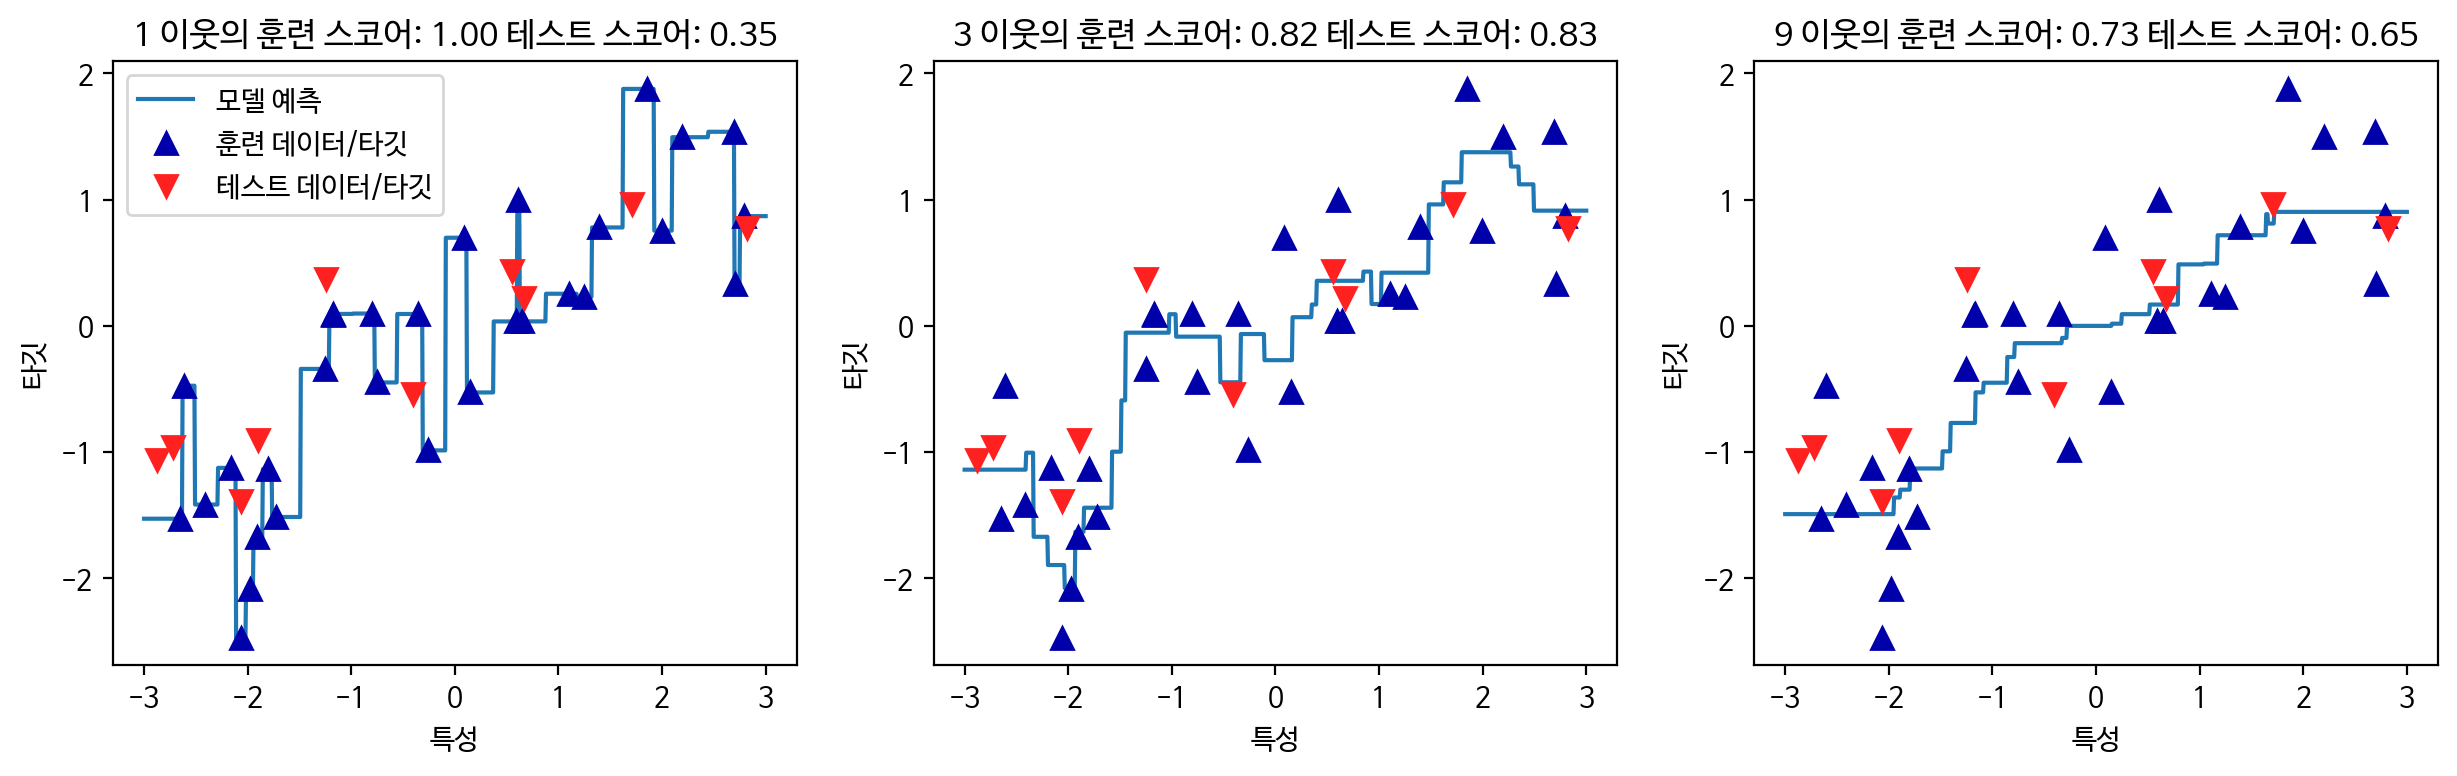

In [19]:
import numpy as np

fig, axes = plt.subplots(1, 3, figsize=(15, 4),dpi = 100)
plt.rc('font', family ='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

# -3 과 3 사이에 1,000 개의 데이터 포인트를 만듭니다
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # 1, 3, 9 이웃을 사용한 예측을 합니다
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} 이웃의 훈련 스코어: {:.2f} 테스트 스코어: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel("특성")
    ax.set_ylabel("타깃")
    
axes[0].legend(["모델 예측", "훈련 데이터/타깃", "테스트 데이터/타깃"], loc="best")
plt.show()

### 선형 모델 : 선형 함수를 만들어 예측 수행

선형 회귀 모델

w[0]: 0.393906  b: -0.031804


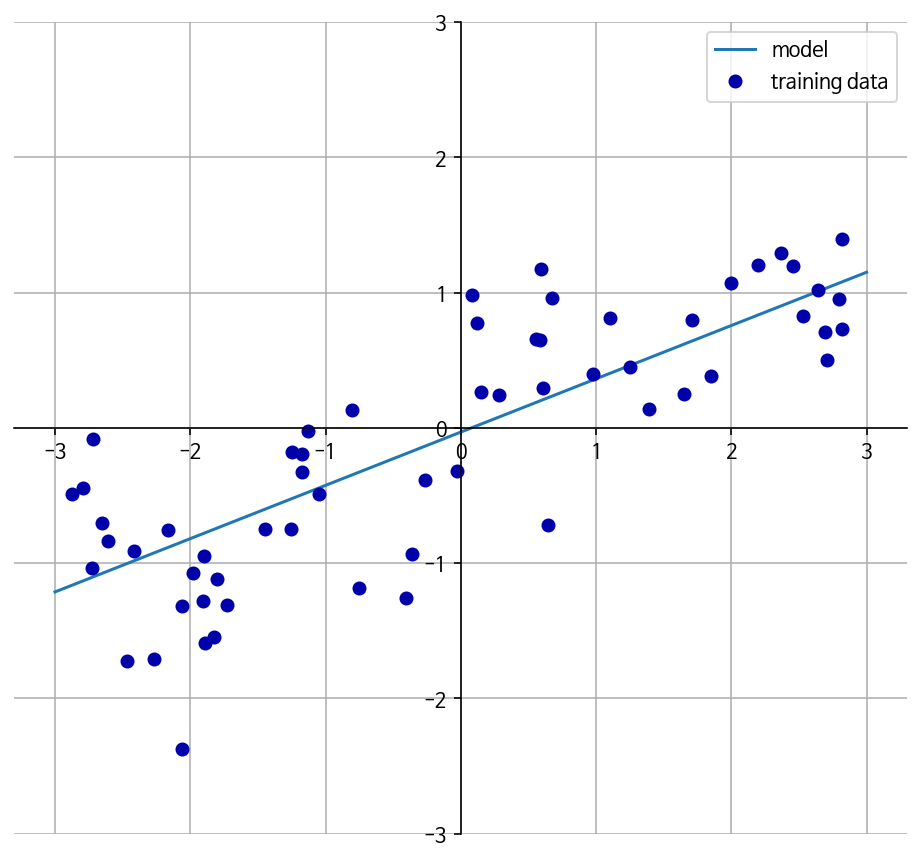

In [20]:
mglearn.plots.plot_linear_regression_wave()

선형회귀 (lenear regression, 최소 제곱법)

In [21]:
# 데이터 준비하기
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X,y = mglearn.datasets.make_wave(n_samples=60)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

lr = LinearRegression().fit(X_train,y_train)

In [24]:
# lr 객체 확인하기
print("lr.coef_:",lr.coef_)
print("lr.intercept_:",lr.intercept_)

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


In [25]:
# 성능 평가
print("훈련 세트 점수 :{:.2f}".format(lr.score(X_train,y_train)))
print("테스트 세트 점수 :{:.2f}".format(lr.score(X_test,y_test)))
# -> 훈련-테스트 세트의 점수가 비슷하거나 낮으면 과소 적합된 상황

훈련 세트 점수 :0.67
테스트 세트 점수 :0.66


### 보스턴 주택가격 데이터셋을 사용한 선형 회귀 성능 평가

In [26]:
X,y = mglearn.datasets.load_extended_boston()
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
lr = LinearRegression().fit(X_train,y_train)

In [27]:
print("훈련 세트 점수 :{:.2f}".format(lr.score(X_train,y_train)))
print("테스트 세트 점수 :{:.2f}".format(lr.score(X_test,y_test)))
# -> 과대 적합 (overfitting) 상태

훈련 세트 점수 :0.95
테스트 세트 점수 :0.61


### 릿지(ridge) 회귀
- overfitting (과대적합)일 때 규제(regularization) 

In [29]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train,y_train)
print("훈련 세트 점수 :{:.2f}".format(ridge.score(X_train,y_train)))
print("테스트 세트 점수 :{:.2f}".format(ridge.score(X_test,y_test)))

훈련 세트 점수 :0.89
테스트 세트 점수 :0.75


alpha 매개변수를 통해 모델 설정
- 기본 값 : 1.0

In [30]:
# alpha값만 조정(10)하여 성능 평가 

ridge10 = Ridge(alpha=10).fit(X_train,y_train)
print("훈련 세트 점수 :{:.2f}".format(ridge10.score(X_train,y_train)))
print("테스트 세트 점수 :{:.2f}".format(ridge10.score(X_test,y_test)))

훈련 세트 점수 :0.79
테스트 세트 점수 :0.64


In [31]:
# alpha값만 조정(0.1)하여 성능 평가 

ridge1 = Ridge(alpha=.1).fit(X_train,y_train)
print("훈련 세트 점수 :{:.2f}".format(ridge1.score(X_train,y_train)))
print("테스트 세트 점수 :{:.2f}".format(ridge1.score(X_test,y_test)))

훈련 세트 점수 :0.93
테스트 세트 점수 :0.77


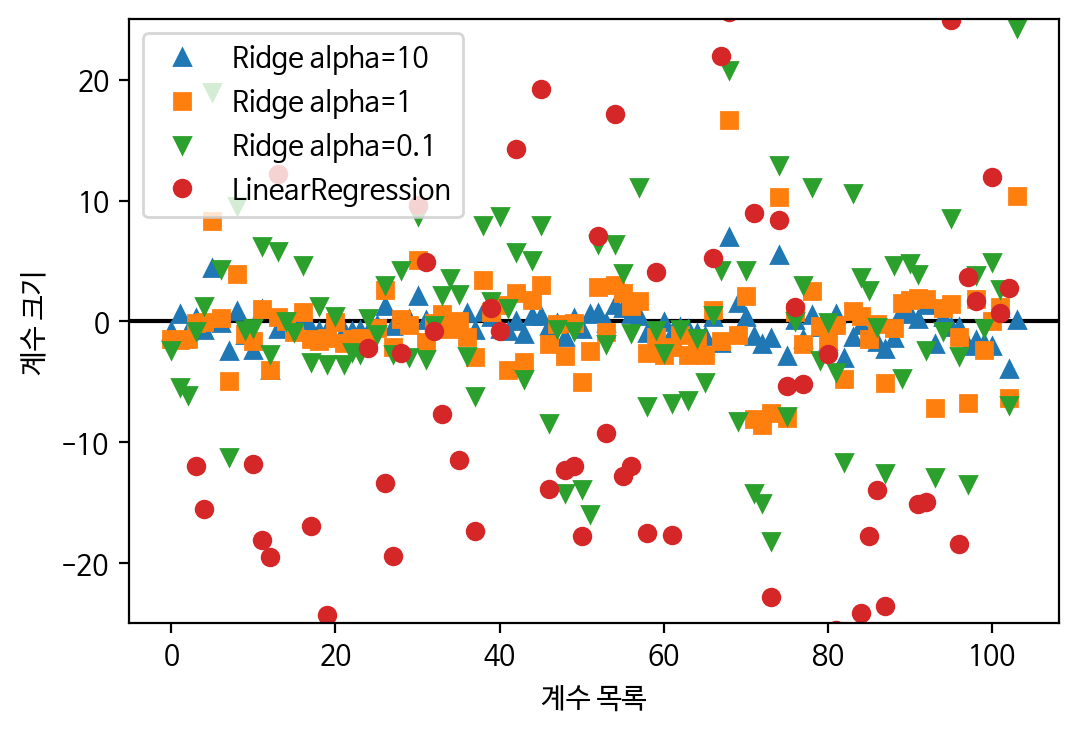

In [34]:
plt.figure(dpi=100)
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge1.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()
plt.show()

### Lasso 
- 확장된 보스턴 주택가격 데이터셋에 라쏘를 적용

In [36]:
from sklearn.linear_model import Lasso
import numpy as np

lasso = Lasso().fit(X_train,y_train)
print("훈련 세트 점수 :{:.2f}".format(lasso.score(X_train,y_train)))
print("테스트 세트 점수 :{:.2f}".format(lasso.score(X_test,y_test)))
print("사용한 특성의 개수:",np.sum(lasso.coef_ != 0))

훈련 세트 점수 :0.29
테스트 세트 점수 :0.21
사용한 특성의 개수: 4


In [38]:
# 과소적합을 줄이기 위해서 alpha값 설정
lasso001 = Lasso(alpha=0.01, max_iter=50000).fit(X_train,y_train)
print("훈련 세트 점수 :{:.2f}".format(lasso001.score(X_train,y_train)))
print("테스트 세트 점수 :{:.2f}".format(lasso001.score(X_test,y_test)))
print("사용한 특성의 개수:",np.sum(lasso001.coef_ != 0))

훈련 세트 점수 :0.90
테스트 세트 점수 :0.77
사용한 특성의 개수: 33
